### Step 0: Load The Data

In [23]:
# Load pickled data
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
import pickle
import numpy as np
import tensorflow as tf
import os
import cv2
from scipy import ndimage, misc

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "1"


### Step 1: Dataset Summary & Exploration
The pickled data is a dictionary with 4 key/value pairs:

* 'features' is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
* 'labels' is a 1D array containing the label/class id of the traffic sign. The file signnames.csv contains id -> name mappings for each id.
* 'sizes' is a list containing tuples, (width, height) representing the original width and height the image.
* 'coords' is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES
Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the pandas shape method might be useful for calculating some of the summary results.

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [98]:
training_file = "./traffic-signs-data/train.p"
validation_file = "./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)

image_shape = np.shape(X_train[0])
print(image_shape)
n_classes = len(np.unique(y_train))

EPOCHS = 50
BATCH_SIZE = 129

(32, 32, 3)


#### Converting the images to Grayscale and normalizing

In [99]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include
### converting to grayscale, etc.
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_train_normalized = (X_train_gray - np.float32(128))/np.float32(128)

#### Visualizing the images before and after normalization

255


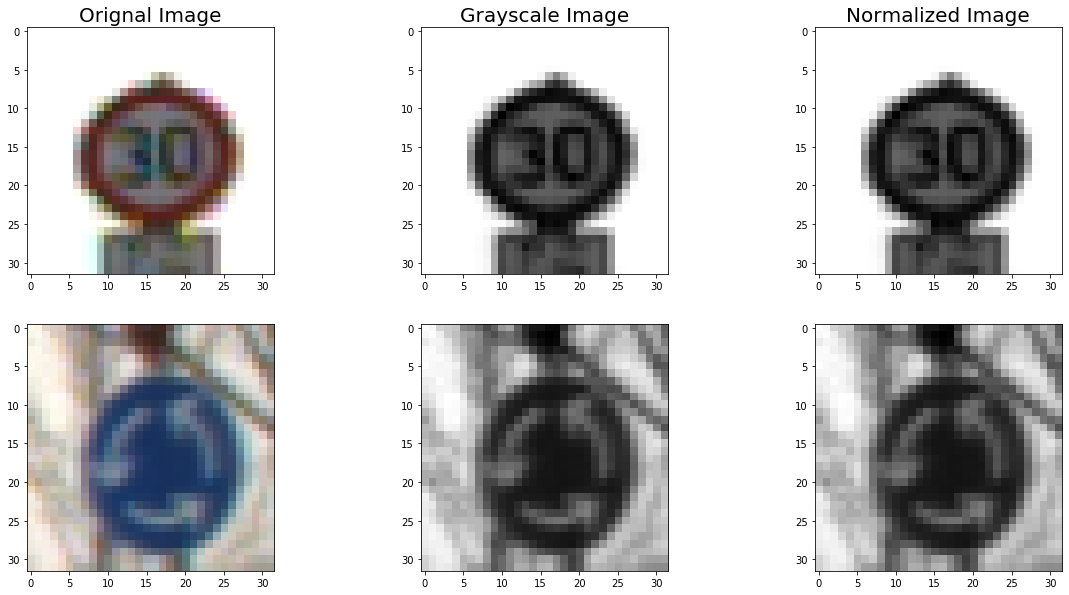

In [100]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

print(X_train[2341][0][0][2])
fig, axs = plt.subplots(2,3,figsize=(20,10))
axs[0][0].set_title('Orignal Image', fontsize=20)
axs[0][1].set_title('Grayscale Image', fontsize=20)
axs[0][2].set_title('Normalized Image', fontsize=20)
axs[0][0].imshow(X_train[2341])
axs[1][0].imshow(X_train[4354])
axs[0][1].imshow(X_train_gray[2341].squeeze() , cmap='gray')
axs[1][1].imshow(X_train_gray[4354].squeeze() , cmap='gray')
axs[0][2].imshow(X_train_normalized[2341].squeeze() , cmap='gray')
axs[1][2].imshow(X_train_normalized[4354].squeeze() , cmap='gray')

#### Check the image distribution by distributing the images to distinct containers. There are in total 43 valid sign types 

(array([ 30., 240., 240., 150., 210., 210.,  60., 150., 150., 150., 210.,
        150., 210., 240.,  90.,  90.,  60., 120., 120.,  30.,  60.,  60.,
         60.,  60.,  30., 150.,  60.,  30.,  60.,  30.,  60.,  90.,  30.,
         90.,  60., 120.,  60.,  30., 210.,  30.,  60.,  30.,  30.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of 43 Patch objects>)

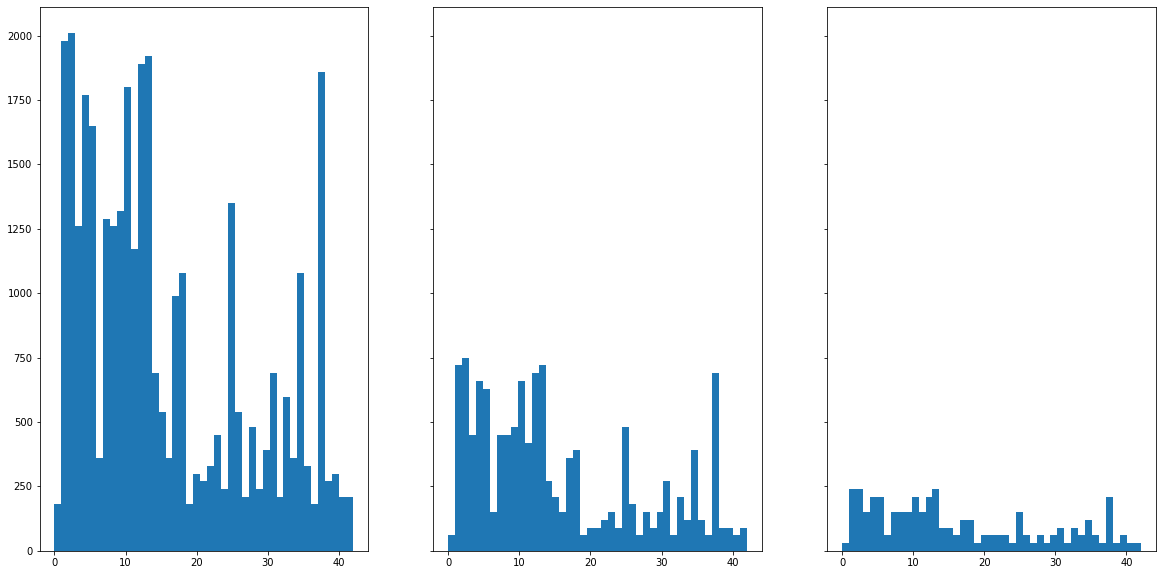

In [101]:
fig, axs = plt.subplots(1,3,figsize=(20,10),sharex=False, sharey=True)
axs[0].hist(y_train,bins=43)
axs[1].hist(y_test,bins=43)
axs[2].hist(y_valid,bins=43)

In [102]:
from random import randrange

def rotate():
    print("**************Calling rotate function")
    global X_train
    global y_train
    imgs = []
    length = int(len(X_train)/3)
    print("************** shape = " ,X_train.shape)
    print("************** y shape = " ,y_train.shape)
    for i in range(length):
        irand = randrange(0,n_train)
        img_30 = ndimage.rotate(X_train[irand],30,reshape=False)    # the new pic doesnt reshape to fit the boundaries
        imgs.append(img_30)
        y_train = np.append(y_train,y_train[irand])
    print("*************** 30 deg rotation finished")
    npa = np.asarray(imgs)
    X_train = np.concatenate((X_train,npa), axis=0)
    print("************** shape 2 = " ,X_train.shape)
    print("************** y shape 2= " ,y_train.shape)

    X_train, y_train = shuffle(X_train, y_train)

    imgs = []
    for i in range(length):
        irand = randrange(0,n_train)
        img_n30 = ndimage.rotate(X_train[irand],-30,reshape=False)  # the new pic doesnt reshape to fit the boundaries
        imgs.append(img_30)
        y_train = np.append(y_train,y_train[irand])
    npa = np.asarray(imgs)
    X_train = np.concatenate((X_train,npa), axis=0)

    print("**************** -30 deg rotation finished")
    

#### Call rotate function for data augmentation

In [ ]:
X_train, y_train = shuffle(X_train_normalized, y_train)
rotate()
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
def warp():
    print("**************Calling warp function")
    more_X_train = []
    more_Y_train = []
    global X_train
    global y_train
    length = int(len(X_train)/5)
    for i in range(length):
        irand = randrange(0,n_train)
        dx, dy = np.random.randint(-1.7, 1.8, 2)
        M = np.float32([[1, 0, dx], [0, 1, dy]])
        dst = cv2.warpAffine(X_train[irand], M, (X_train[irand].shape[0], X_train[irand].shape[1]))
        dst = dst[:,:,None]
        more_X_train.append(dst)
        more_Y_train.append(y_train[irand])

    more_X_train = np.array(more_X_train)
    more_Y_train = np.array(more_Y_train)
    print(more_X_train[0].shape)
    print(X_train[0].shape)
    X_train = np.concatenate((X_train, more_X_train), axis=0)
    y_train = np.concatenate((y_train, more_Y_train), axis=0)

#warp()
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
def sharpen():
    print("**************Calling rotate function")
    global X_train
    global y_train
    imgs = []
    length = int(len(X_train)/5)
    alpha = 30

    for i in range(length):
        irand = randrange(0,n_train)
        blurred_f  = ndimage.gaussian_filter(X_train[irand], 3)
        filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
        img_sharp = blurred_f + alpha * (blurred_f - filter_blurred_f)
        imgs.append(img_sharp)
        y_train = np.append(y_train,y_train[irand])
    print("*************** shapening finished")
    npa = np.asarray(imgs)
    X_train = np.concatenate((X_train,npa), axis=0)

#sharpen()
#X_train, y_train = shuffle(X_train, y_train)

In [ ]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def call_brightness():
    global X_train
    global y_train
    length = int(len(X_train)/5)
    imgs = []
    for i in range(length):
        irand = randrange(0,n_train)
        if(i%100 == 0):
            print("completed ",(i/100 - 100 + 1), " percent" )
        frame = increase_brightness(X_train[irand],20)
        imgs.append(frame)
        y_train = np.append(y_train,y_train[irand])

    npa = np.asarray(imgs)
    X_train = np.concatenate((X_train,npa), axis=0)

#call_brightness()
#X_train, y_train = shuffle(X_train, y_train)

In [103]:
n_train = len(X_train)
print("****************************************")
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("****************************************")
input("Press Enter to continue...")

****************************************
Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
****************************************
Press Enter to continue...


''

In [104]:
def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    dropout = 0.50  # Dropout, probability to keep units

    # Layer 1: Convolution. Input = 32x32x3 Output = 28x28x6
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1,1,1,1], padding='VALID') + conv1_b

    # Activation
    conv1 = tf.nn.relu(conv1)

    # Pooling - 28x28x6 to 14x14x6
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')


    # Layer 2: Convolution.  Output = 10x10x6
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,1,1,1], padding='VALID') + conv2_b

    # Activation
    conv2 = tf.nn.relu(conv2)

    # Pooling - 10x10x16 to 5x5x16
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

    # Flatten - 5x5x16, Output = 400
    fc0 = flatten(conv2)

    #Layer 3 - Fully connected . Input = 400, output = 120
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_w) + fc1_b

    # Activation
    fc1 = tf.nn.relu(fc1)

    #Layer 4 - Fully connected . Input = 120, output = 84
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_w) + fc2_b

    # Activation
    fc2 = tf.nn.relu(fc2)

    #Layer 5 - Fully connected . Input = 84, output = 43
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_w) + fc3_b


    return logits

In [105]:
# placeholder
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline

rate = 0.00097

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.compat.v1.train.Saver()

In [106]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [107]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected,
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.693

EPOCH 2 ...
Validation Accuracy = 0.792

EPOCH 3 ...
Validation Accuracy = 0.848

EPOCH 4 ...
Validation Accuracy = 0.846

EPOCH 5 ...
Validation Accuracy = 0.856

EPOCH 6 ...
Validation Accuracy = 0.853

EPOCH 7 ...
Validation Accuracy = 0.854

EPOCH 8 ...
Validation Accuracy = 0.855

EPOCH 9 ...
Validation Accuracy = 0.859

EPOCH 10 ...
Validation Accuracy = 0.883

EPOCH 11 ...
Validation Accuracy = 0.861

EPOCH 12 ...
Validation Accuracy = 0.891

EPOCH 13 ...
Validation Accuracy = 0.861

EPOCH 14 ...
Validation Accuracy = 0.886

EPOCH 15 ...
Validation Accuracy = 0.883

EPOCH 16 ...
Validation Accuracy = 0.898

EPOCH 17 ...
Validation Accuracy = 0.883

EPOCH 18 ...
Validation Accuracy = 0.874

EPOCH 19 ...
Validation Accuracy = 0.883

EPOCH 20 ...
Validation Accuracy = 0.876

EPOCH 21 ...
Validation Accuracy = 0.901

EPOCH 22 ...
Validation Accuracy = 0.893

EPOCH 23 ...
Validation Accuracy = 0.889

EPOCH 24 ...
Validation Accura